# Long-$n$ Rydberg Scan

### Configure Ipython

In [3]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
#import custom packages
import sspals, oskar
import f2mods as f2

### Import Data

In [4]:
rid = '20160318_153639'
h5 = oskar.H5Data(rid)             # data
h5.load_log()
out_dire = h5.out_dire("Analysis")  # output

In [5]:
#read data
DF = h5.load_av(verbose=True, loop=True, exclude=['avL_SSPALS.dat', 
                                                    'avL_SSPALS_CH_L0[ -1.00e-08   2.20e-07   6.50e-07].dat'])
DF.head()

Loaded: av_SSPALS.dat


,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps,t0_mean,t0_std,t0_sem,DF_reps,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
VID,,,,,,,,,,,,,,,,,,,,,
1,5.950000e-07,735.6035,243.2,2000,2000,15845,1.783382e-07,2.192681e-10,1.741925e-12,15845,...,0.005855,0.000047,15845,0.478971,0.026768,0.000213,15845,1.123829e-08,5.397485e-10,4.287906e-12
2,5.950000e-07,736.4084,243.2,2000,2000,15856,1.783396e-07,2.165617e-10,1.719828e-12,15856,...,0.005985,0.000048,15856,0.478847,0.026927,0.000214,15856,1.124480e-08,5.354025e-10,4.251905e-12
3,5.950000e-07,737.3534,243.2,2000,2000,15844,1.783434e-07,2.170459e-10,1.724326e-12,15844,...,0.005990,0.000048,15844,0.478709,0.026818,0.000213,15844,1.125155e-08,5.461719e-10,4.339073e-12
4,5.950000e-07,738.4732,243.2,2000,2000,15904,1.783389e-07,2.197504e-10,1.742515e-12,15904,...,0.005968,0.000047,15904,0.478920,0.026912,0.000213,15904,1.124039e-08,5.372251e-10,4.259936e-12
5,5.950000e-07,739.8138,243.2,2000,2000,15828,1.783363e-07,2.200096e-10,1.748754e-12,15828,...,0.005979,0.000048,15828,0.478907,0.026731,0.000212,15828,1.124964e-08,5.419120e-10,4.307405e-12


## Plot Data

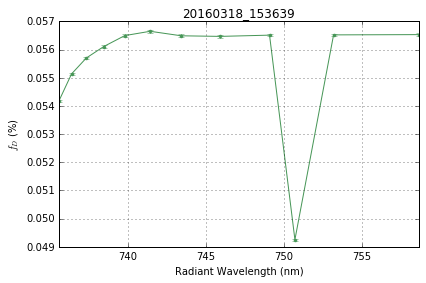

In [6]:
X = 'IR'
Y = 'DF'
#plot setup
fig, ax = plt.subplots()

sg = DF.sort_values(by=X)
x = sg[X].values
y = sg[Y+'_mean'].values
yerr = sg[Y+'_sem'].values
ax.errorbar(x, y, yerr=yerr, fmt ='.-', color=oskar.colors[1])

#format
ax.set_ylabel("$f_{D}$ (%)")
ax.set_xlabel("Radiant Wavelength (nm)")
ax.set_xlim(x.min(), x.max())
ax.grid(True)
ax.set_title(rid)
plt.tight_layout()

#save data
fileout = os.path.join(out_dire, "long_n_DF.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()

## Signal

In [7]:
#calculate signal 
back = DF[(DF[X] > 750) & (DF[X] < 753)][Y+'_mean'] #define background
bk = back.mean()
bk_sem = back.std()/np.sqrt(back.count())
sig = sspals.signal(DF[Y+'_mean'], DF[Y+'_sem'], bk, bk_sem)
DF['S'] = sig[0]
DF['S_err'] = sig[1]

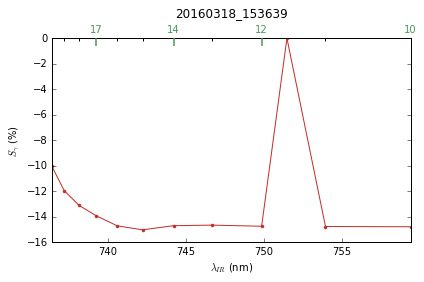

In [8]:
X = 'IR'
Y2 = 'S'
#plot setup
fig, ax = plt.subplots(figsize=(6, 4))

#plot
DF = DF.sort_values(by=X)
x = f2.rad_cal(DF[X].values)
y = DF[Y2].values
yerr = DF[Y2+'_err'].values
eb = ax.errorbar(x, y, yerr=yerr, fmt ='.-', color=oskar.colors[2])

#labels
ax.set_ylabel("$S_\gamma$ (%)")
ax.set_xlabel("$\lambda_{IR}$ (nm)")

ax.set_xlim(x.min(), x.max())
ax, ax_top, ticks = f2.ryd_ticks(ax, color = oskar.colors[1], unit='nm',
                          labels=[10, 12, 14, 17, 22, 33, 100])
ax_top.set_xlim(ax.get_xlim())
ax.axhline(0, alpha=0.5, c='k')

ax_top.tick_params(axis='both', which='major', length=8, width=1.5, color = oskar.colors[1])
ax_top.tick_params(axis='both', which='minor', length=3, width=1)

ax.set_title(rid, y=1.08)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "long_n_S.png")
plt.savefig(fileout, dpi=150, bbox_inches='tight')
plt.show()